<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>
[[19 18 28 ... 18 21 61]
 [0 1 1 ... 0 0 0]
 [27.9 33.77 33.0 ... 36.85 25.8 29.07]
 ...
 [2 1 1 ... 1 2 4]
 [0 1 1 ... 1 0 0]
 [16884.924

C:\Users\SANJAY\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\SANJAY\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SANJAY\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

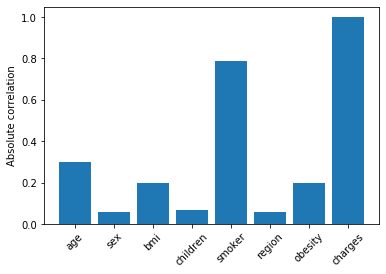

Linear Regression
Training Data  (936, 7) (936,)
Testing Data  (402, 7)
MSE-> Train: 37245079.553,Test:32715069.984
R2_Score ->  Train: 0.736,Test:0.795
Random Forest Regression
[3393.53677619]
[[18.     0.    28.215  0.     1.     3.     0.   ]]
MSE -> Train: 3535449.280, MSE test: 21759935.506
R2 Score-> Train: 0.975, MSE test: 0.864


In [3]:
import tkinter as tk
# from sklearn import sklearn.impute
# import sklearn 
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
data=pd.read_csv("insurance_dataset.csv")
print(data.info)

data.smoker[data.smoker == 'yes'] = 0
data.smoker[data.smoker == 'no'] = 1

data.sex[data.sex == 'female'] = 0
data.sex[data.sex == 'male'] = 1

data.region[data.region == 'southeast'] = 1
data.region[data.region == 'southwest'] = 2
data.region[data.region == 'northeast'] = 3
data.region[data.region == 'northwest'] = 4
data["obesity"] = ""
data.obesity[data.bmi >=30] = 1
data.obesity[data.bmi <30] = 0
data=data[['age','sex','bmi','children','smoker','region','obesity','charges']]
print(data.values.T)

x=data.iloc[:,:-1].values
y=data['charges'].values
print(x.shape)
print(y.shape)
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
x = imputer.fit_transform(x)
y = y.reshape(-1,1)
y = imputer.fit_transform(y)
y = y.reshape(-1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled = scaler.fit_transform(data)
print(data_scaled.mean(axis=0))
print(data_scaled.std(axis=0))

print(x.shape)
print(y.shape)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

corr_vals = []
collabel = []
for col in [i for i in data.columns]:
    p_val = sp.stats.pearsonr(data[col], data["charges"])
    corr_vals.append(np.abs(p_val[0]))
    print(col, ": ", np.abs(p_val[0]))
    collabel.append(col)
plt.bar(range(1, len(corr_vals) + 1), corr_vals)
plt.xticks(range(1, len(corr_vals) + 1), collabel, rotation=45)
plt.ylabel("Absolute correlation")
plt.show()



#Predicting Value using Linear Regression
print("Linear Regression")
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.3,random_state=0)
print('Training Data ',x_train.shape,y_train.shape)
print('Testing Data ',x_test.shape)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_test_pred=lr.predict(x_test)
y_train_pred=lr.predict(x_train)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE-> Train: %.3f,Test:%.3f'%(mean_squared_error(y_train,y_train_pred), mean_squared_error(y_test,y_test_pred)))
print('R2_Score ->  Train: %.3f,Test:%.3f'%(r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred)))

#Predicting Value Using Random Forest Regression

print("Random Forest Regression")

from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=1000, criterion='mse',random_state=1, n_jobs=-1)
forest.fit(x_train,y_train)
y_train_pred=forest.predict(x_train)
y_test_pred=forest.predict(x_test)
print(forest.predict(x_train[:1]))
print(x_train[:1])
# Computing  Performance

from sklearn.metrics import mean_squared_error
t_train=mean_squared_error(y_train,y_train_pred)
t_test=mean_squared_error(y_test,y_test_pred)
print('MSE -> Train: %.3f, MSE test: %.3f'%(t_train,t_test))
from sklearn.metrics import r2_score
t_train1=r2_score(y_train,y_train_pred)
t_test1=r2_score(y_test,y_test_pred)
print('R2 Score-> Train: %.3f, MSE test: %.3f'%(t_train1,t_test1))





# tkinter GUI
root = tk.Tk()
root.geometry("1600x700+0+0")
canvas1 = tk.Canvas(root, width=500, height=700)
canvas1.pack()


# New_Interest_Rate label and input box
label1 = tk.Label(root,font=( 'aria' ,12, 'bold' ), text='Age(18 - 64)   ',bd=10,anchor='w')
canvas1.create_window(120, 100, window=label1)

entry1 = tk.Entry(root,font=('ariel' ,12,'bold'),bd=6)  # create 1st entry box
canvas1.create_window(275, 100, window=entry1)


label2 = tk.Label(root, text=' Gender     ',font=( 'aria' ,12, 'bold' ))
canvas1.create_window(120, 133, window=label2)

#entry2 = tk.Entry(root)  # create 2nd entry box

entry2 = tk.Radiobutton(root,text='Male',padx=25,value=0).place(x=700,y=120)
entry2 = tk.Radiobutton(root,text='Female',padx=20,value=1).place(x=780,y=120)


#canvas1.create_window(270, 120, window=entry2)

label3 = tk.Label(root, text=' Weight(kg)    ',font=( 'aria' ,12, 'bold' ))
canvas1.create_window(120, 165, window=label3)

entry3 = tk.Entry(root,font=('ariel' ,12,'bold'),bd=6)  # create 2nd entry box
canvas1.create_window(275, 165, window=entry3)


label4 = tk.Label(root, text=' Height(cm)  ',font=( 'aria' ,12, 'bold' ))
canvas1.create_window(120, 210, window=label4)

entry4 = tk.Entry(root,font=('ariel' ,12,'bold'),bd=6)  # create 2nd entry box
canvas1.create_window(275, 210, window=entry4)


label5 = tk.Label(root, text=' Children  ',font=( 'aria' ,12, 'bold' ))
canvas1.create_window(120, 255, window=label5)

entry5 = tk.Entry(root,font=('ariel' ,12,'bold'),bd=6)  # create 2nd entry box
canvas1.create_window(275, 255, window=entry5)


label6 = tk.Label(root, text=' Smoker (0/1) ',font=( 'aria' ,12, 'bold' ))
canvas1.create_window(120, 295, window=label6)

entry6 = tk.Entry(root,font=('ariel' ,12,'bold'),bd=6)  # create 2nd entry box
canvas1.create_window(275, 295, window=entry6)

label7 = tk.Label(root, text=' Region: ',font=( 'aria' ,12, 'bold' ))
canvas1.create_window(120, 325, window=label7)

#entry7 = tk.Entry(root)  # create 2nd entry box
entry7 = tk.Radiobutton(root,text='SouthEast',padx=20,value=1).place(x=675,y=325)
entry7 = tk.Radiobutton(root,text='SouthWest',padx=20,value=2).place(x=675,y=345)
entry7 = tk.Radiobutton(root,text='NorthEast',padx=20,value=3).place(x=675,y=365)
entry7 = tk.Radiobutton(root,text='NorthWest',padx=20,value=4).place(x=675,y=385)
#canvas1.create_window(270, 220, window=entry7)


def values():
    global age_value  # our 1st input variable
    age_value = float(entry1.get())

    sex_value = 0  # our 2nd input variable
    if entry2 == 0:
        sex_value = 0.0
    elif entry2 == 1:
        sex_value = 1.0

    global bmi_value  # our 2nd input variable
    weight = float(entry3.get())
    height = float(entry4.get())
    if height==0:
        height=1
    bmi_value=weight/(height/100)

    global children_value  # our 2nd input variable
    children_value = float(entry5.get())

    global smoker_value  # our 2nd input variable
    smoker = entry6.get()
    if smoker == "yes":
        smoker_value = 0
    else :
        smoker_value = 1
    smoker_value = float(smoker_value)


    region_value = 0
    if entry7 == 1:
        region_value = 1.0
    elif entry7 == 2:
        region_value = 2.0
    elif entry7 == 3:
        region_value = 3.0
    elif entry7 == 4:
        region_value = 4.0



    global obesity_value
    if bmi_value >= 30:
        obesity_value = 1.0
    else:
        obesity_value = 0.0

    ready_value = [age_value, sex_value, bmi_value, children_value, smoker_value, region_value, obesity_value]

    pr1 = lr.predict([ready_value])#by linear regression
    pr2 = forest.predict([ready_value])#by random forest
    pr = (pr1+pr2)/2
    pr = abs(pr)

    Prediction_result = ('Predicted Insurance price : ', pr)
    label_Prediction = tk.Label(root, font=( 'aria' ,16, 'bold' ),text=Prediction_result)
    canvas1.create_window(500, 500, window=label_Prediction)


button1 = tk.Button(root,padx=16,pady=8,bd=10,fg="black",font=('ariel' ,12,'bold'),width=20, text='Predict Insurance Cost', command=values,bg='teal')  # button to call the 'values' command above
canvas1.create_window(100, 500, window=button1)#this cannot exceed canvas size
label_main = tk.Label(root,text="Insurance Cost Prediction system",fg="steel blue",bd=10,font=('ariel' ,25,'bold'))
canvas1.create_window(250,35,window=label_main)

root.mainloop()